# KMeans with averaged rating value example

## Import the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [3]:
# Load the data
#We have taken already cleaned data
data = pd.read_csv ('questionairre_rating.csv')

In [4]:
# Check what's inside
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,874366.000000,874366.000000,874366.000000,874366.000000,874366.000000,874366.000000,874366.000000,874366.000000,874366.000000,874366.000000,...,874366.000000,874366.000000,874366.00000,874366.000000,874366.000000,874366.000000,874366.000000,874366.000000,874366.000000,874366.000000
mean,2.645722,2.795878,3.298991,3.167780,3.297526,2.411209,2.780486,3.443966,2.979552,3.588271,...,3.703012,2.070539,4.03500,1.995500,3.824292,1.901216,4.022253,3.221338,4.166729,3.983932
std,1.250873,1.306719,1.188253,1.210437,1.239671,1.208842,1.380443,1.242380,1.325272,1.274354,...,1.100085,1.095057,1.04003,1.071263,0.933457,1.084801,0.935575,1.222729,0.971584,0.986200
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,1.000000,3.00000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,4.000000,2.000000,4.00000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,3.000000,5.00000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
#We ignore country for our analysis right now
data = data.drop('country', axis = 1)
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [6]:
#We average each of the 10 questions since each have the same weight
# I'm just playing around and learning here so, let's see how this goes:)

col_ext = data.loc[: , "EXT1":"EXT10"]
data['EXT_Mean'] = col_ext.mean(axis = 1)
col_opn = data.loc[: , "OPN1":"OPN10"]
data['OPN_Mean'] = col_opn.mean(axis = 1)
col_est = data.loc[: , "EST1":"EST10"]
data['EST_Mean'] = col_est.mean(axis = 1)
col_agr = data.loc[: , "AGR1":"AGR10"]
data['AGR_Mean'] = col_agr.mean(axis = 1)
col_csn = data.loc[: , "CSN1":"CSN10"]
data['CSN_Mean'] = col_csn.mean(axis = 1)
data_new = data[['EXT_Mean','OPN_Mean','EST_Mean','AGR_Mean','CSN_Mean']]
data_new.head()


,EXT_Mean,OPN_Mean,EST_Mean,AGR_Mean,CSN_Mean
0,3.0,3.3,2.4,3.1,3.2
1,3.4,2.7,2.1,3.2,3.1
2,2.9,3.1,2.6,2.8,2.8
3,2.6,3.1,2.7,3.2,2.7
4,3.5,3.6,2.3,3.0,3.2


## Clustering and Elbow method

In [7]:
# Createa an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(data_new)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

[822320.0281491394,
 567759.7443456826,
 504090.7003201314,
 456846.4212309456,
 426337.109955685,
 401896.1386220768,
 384070.0810148235,
 368568.9907328358,
 354298.6682579681]

Text(0, 0.5, 'WCSS')

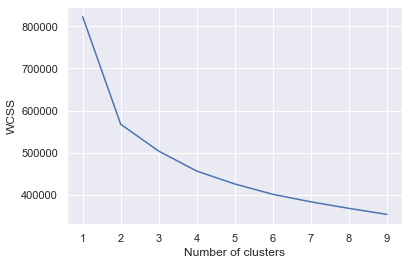

In [8]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Explore clustering solutions and select the number of clusters

In [10]:
# WE see elbow at 5
kmeans = KMeans(5)
# Fit the data
kmeans.fit(data_new)
# Create a new data frame with the predicted clusters
clusters = data_new.copy()
clusters['cluster_pred'] = kmeans.fit_predict(data_new)

In [11]:
# Check if everything seems right
clusters

,EXT_Mean,OPN_Mean,EST_Mean,AGR_Mean,CSN_Mean,cluster_pred
0,3.0,3.3,2.4,3.1,3.2,1
1,3.4,2.7,2.1,3.2,3.1,1
2,2.9,3.1,2.6,2.8,2.8,2
3,2.6,3.1,2.7,3.2,2.7,2
4,3.5,3.6,2.3,3.0,3.2,1
...,...,...,...,...,...,...
874361,3.2,2.9,3.3,3.6,3.1,4
874362,3.4,3.3,4.0,3.3,2.8,4
874363,3.3,3.6,2.7,3.5,3.3,3
874364,2.8,3.5,3.3,3.1,3.0,4


# We try to see which cluster  number pertains to which of the 5 personality types and also if our clustering is getting it right

In [15]:
# Check for each cluster number
clusters.loc[clusters['cluster_pred'] == 2].head(100)


,EXT_Mean,OPN_Mean,EST_Mean,AGR_Mean,CSN_Mean,cluster_pred
2,2.9,3.1,2.6,2.8,2.8,2
3,2.6,3.1,2.7,3.2,2.7,2
8,3.4,2.7,3.1,3.3,2.9,2
15,2.9,3.0,2.6,3.5,3.1,2
19,3.1,2.7,2.6,3.1,2.6,2
...,...,...,...,...,...,...
418,3.0,3.3,2.8,3.0,2.7,2
423,2.9,3.1,3.0,3.0,3.2,2
427,2.6,3.4,3.0,3.0,3.0,2
428,2.8,3.4,3.0,2.7,2.9,2
